## Exploration of the images in the training dataset

In [11]:
BASE <- 'fungi_train_val/images'

list_of_folders <- list.files(path = BASE)
length(list_of_folders)

[1] 1394

In [12]:
head(list_of_folders)

[1] "10000_Abortiporus_biennis"     "10025_Achroomyces_disciformis"
[3] "10052_Agaricus_altipes"        "10056_Agaricus_arvensis"      
[5] "10057_Agaricus_augustus"       "10059_Agaricus_bernardii"

In [16]:
tail(list_of_folders)

[1] "67672_Xylodon_flaviporus (Berk. & M.A. Curtis) Riebesehl & E. Langer"
[2] "67678_Xylodon_nespori"                                               
[3] "67679_Xylodon_paradoxus"                                             
[4] "67681_Xylodon_raduloides"                                            
[5] "67753_Aureoboletus_projectellus"                                     
[6] "67758_Ombrophila_pura"

***It appears as if all folder names start with a 5-digit ID, followed by an underscore and then the Latin name of the species.***

In [29]:
folder_counts <- vector(mode = 'numeric', length = length(list_of_folders))
species_names <- vector(mode = 'character', length = length(list_of_folders))
index <- 1

for(folder in list_of_folders) {
    images_path <- gsub(' ', '', paste(BASE, '/', folder))
    folder_counts[index] <- length(list.files(path = images_path))
    name <- substr(folder, start = 7, stop = nchar(folder))
    species_names[index] <- name 
    index <- index + 1  
}

In [30]:
head(folder_counts)

[1]  74  27  20 228 128  36

In [31]:
head(species_names)

[1] "Abortiporus_biennis"     "Achroomyces_disciformis"
[3] "Agaricus_altipes"        "Agaricus_arvensis"      
[5] "Agaricus_augustus"       "Agaricus_bernardii"

In [32]:
class_info <- data.frame(species = species_names, samples_count = folder_counts)
head(class_info)

species,samples_count
Abortiporus_biennis,74
Achroomyces_disciformis,27
Agaricus_altipes,20
Agaricus_arvensis,228
Agaricus_augustus,128
Agaricus_bernardii,36


In [36]:
sorted_class_info <- class_info[order(-class_info$samples_count), ]
head(sorted_class_info)

,species,samples_count
853,Plicatura_crispa,442
855,Pluteus_cervinus,419
1104,Tricholoma_scalpturatum,414
87,Xerocomellus_chrysenteron,406
733,Mycena_galericulata,375
1159,Byssomerulius_corium,374


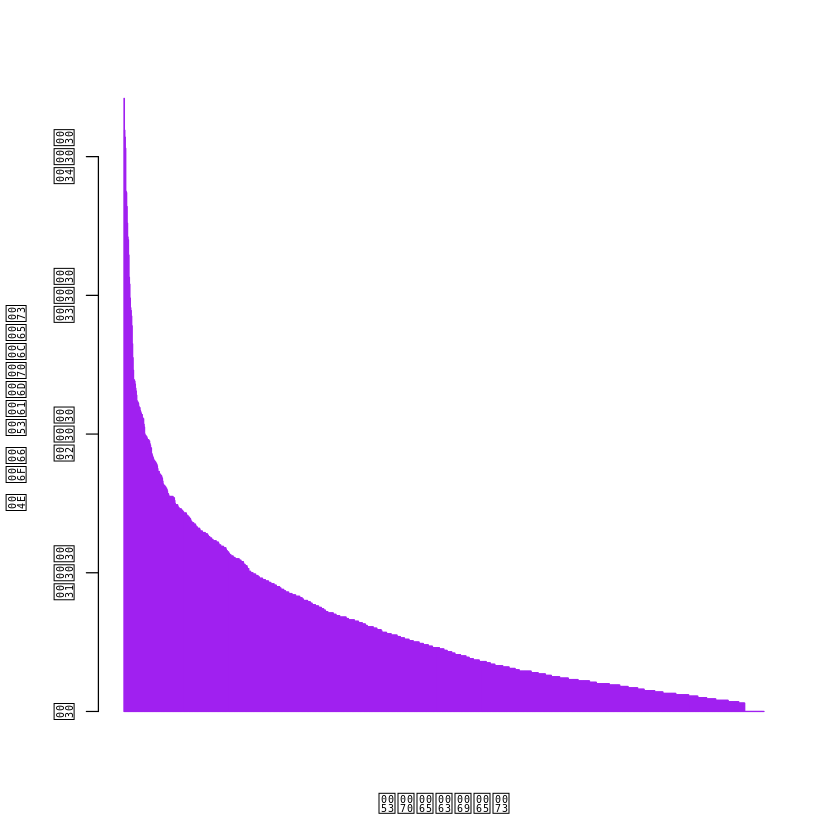

In [38]:
barplot(sorted_class_info$samples_count, xlab = 'Species',
        ylab = 'N of Samples', col = 'purple',
        border = 'purple')

In [49]:
class_labels <- sorted_class_info[sorted_class_info$samples_count >= 125, ]
dim(class_labels)

[1] 191   2